<a href="https://colab.research.google.com/github/sm0602/MLnow_GirlScript/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/LiveCodeSession/titanic'

/content/drive/MyDrive/LiveCodeSession/titanic


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [4]:
ls

cleanedData.csv  gender_submission.csv  test.csv  train.csv


In [5]:
trainData = pd.read_csv('train.csv', sep=',')
trainData.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
testData = pd.read_csv('test.csv', sep=',')
testData.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
trainData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
trainData.fillna(0, inplace=True)
trainData.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [39]:
testData.fillna(0, inplace=True)
testData.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,0,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,0,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,0,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,0,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,0,S


In [9]:
print(len(trainData.columns))
print(trainData.columns)

12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [40]:
print(len(testData.columns))
print(testData.columns)

11
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
print(f'Pclass: {trainData.Pclass.unique()}')
print(f'Sex: {trainData.Sex.unique()}')
print(f'SibSp: {trainData.SibSp.unique()}')
print(f'Parch: {trainData.Parch.unique()}')
print(f'Embarked: {trainData.Embarked.unique()}')

Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' 0]


In [11]:
#Converting numeric to categorical

trainData['Sex'] = trainData['Sex'].apply({'male':1, 'female':0}.get)
trainData['Embarked'] = trainData['Embarked'].apply({'S':1, 'C':2, 'Q':3, np.nan:0}.get)
trainData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1.0
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,3.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,2.0


In [41]:
#Converting numeric to categorical

testData['Sex'] = testData['Sex'].apply({'male':1, 'female':0}.get)
testData['Embarked'] = testData['Embarked'].apply({'S':1, 'C':2, 'Q':3, np.nan:0}.get)
testData.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,0,1
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,0,3
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,0,2
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,0,1


In [12]:
trainData_updated = trainData[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']] 
trainData_updated.head(10)

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,1,1,0,7.2500,1.0,0
1,1,0,1,0,71.2833,2.0,1
2,3,0,0,0,7.9250,1.0,1
3,1,0,1,0,53.1000,1.0,1
4,3,1,0,0,8.0500,1.0,0
5,3,1,0,0,8.4583,3.0,0
6,1,1,0,0,51.8625,1.0,0
7,3,1,3,1,21.0750,1.0,0
8,3,0,0,2,11.1333,1.0,1
9,2,0,1,0,30.0708,2.0,1


In [42]:
testData_updated = testData[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']] 
testData_updated.head(10)

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,1,0,0,7.8292,3
1,3,0,1,0,7.0000,1
2,2,1,0,0,9.6875,3
3,3,1,0,0,8.6625,1
4,3,0,1,1,12.2875,1
5,3,1,0,0,9.2250,1
6,3,0,0,0,7.6292,3
7,2,1,1,1,29.0000,1
8,3,0,0,0,7.2292,2
9,3,1,2,0,24.1500,1


In [13]:
trainData_updated.to_csv('cleanedData.csv')

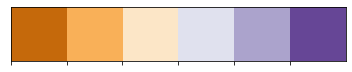

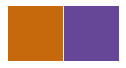

In [14]:
#visualizing the data

import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette('PuOr'))
pal = sns.color_palette('PuOr', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sns_colors = ["#c6690c", "#664697"]
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

##EDA

In [20]:
trainData_updated.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'], dtype='object')

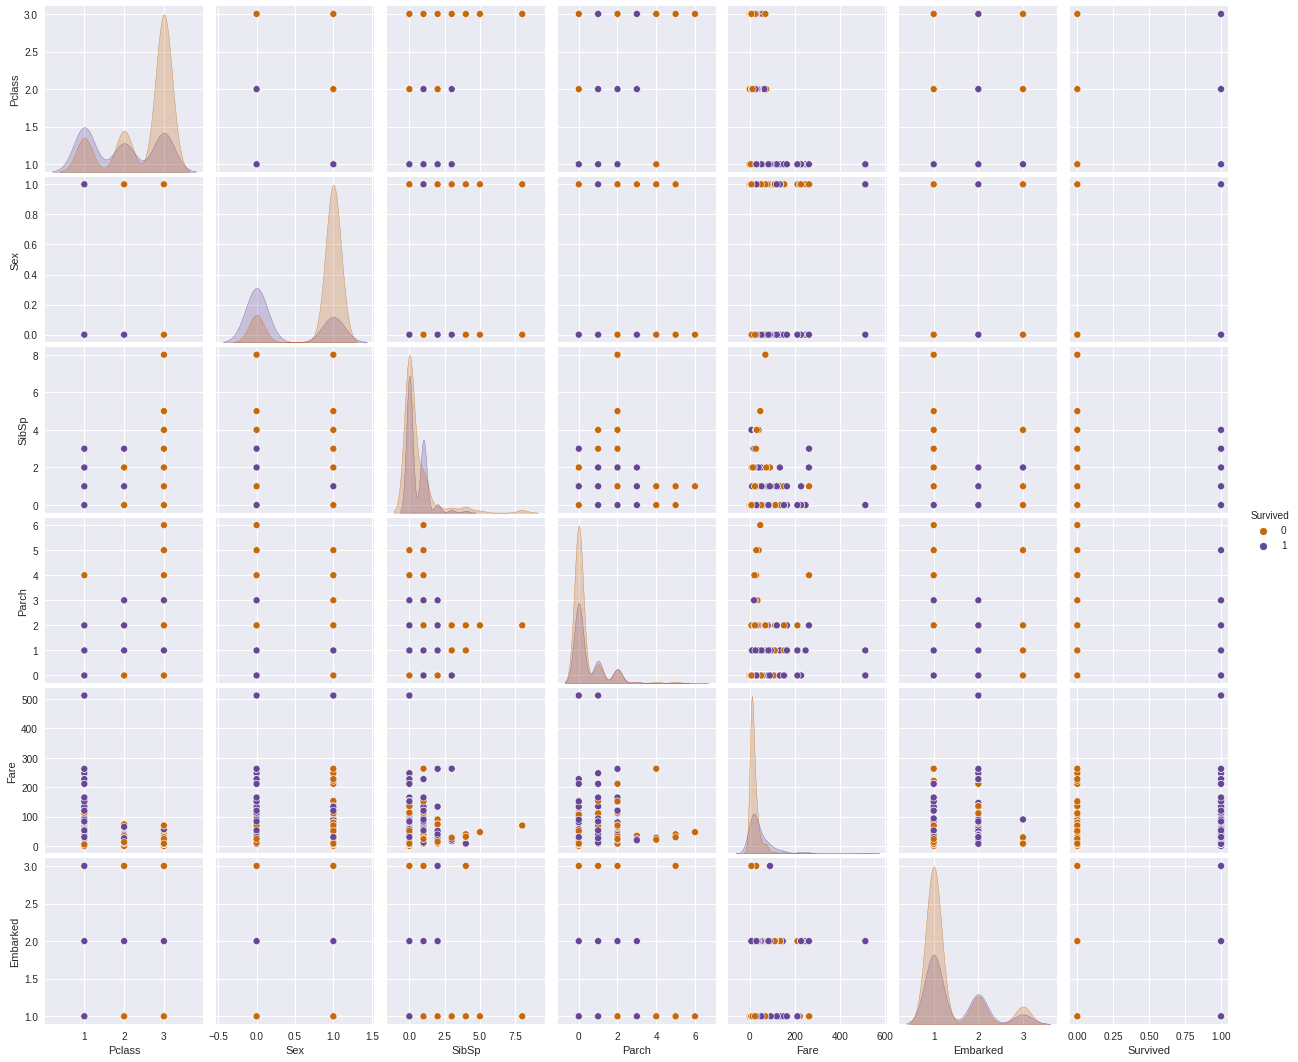

In [16]:
sns.pairplot(trainData_updated,
             x_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'],
             y_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'],
             hue='Survived', diag_kind = 'kde')

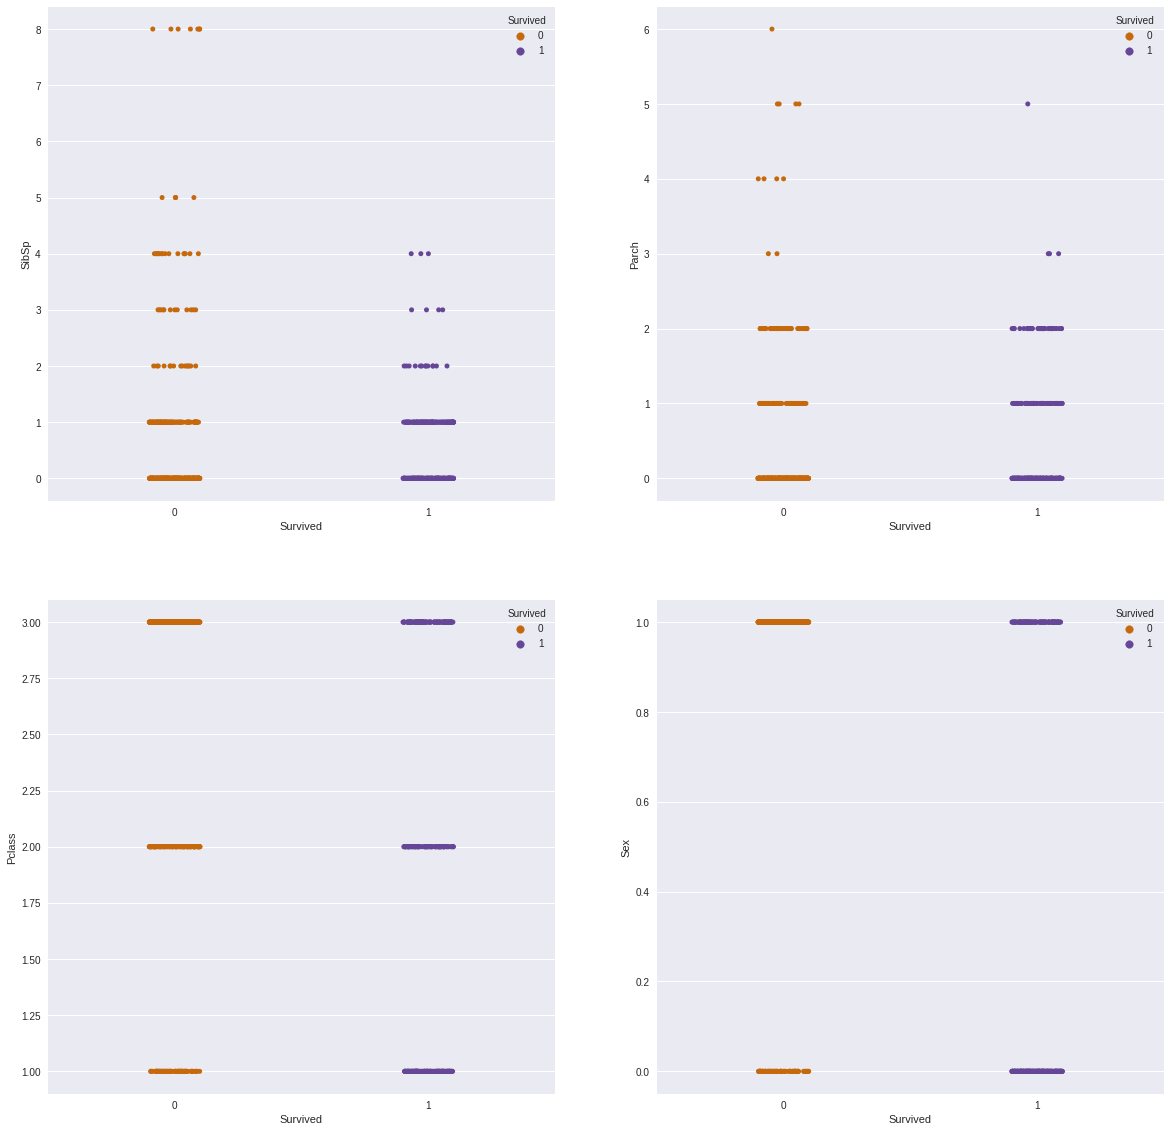

In [21]:
#strip plots

fig, axarr = plt.subplots(2, 2, figsize=(20,20))
sns.stripplot(y='SibSp', x='Survived', data=trainData_updated, hue='Survived', ax=axarr[0][0])
sns.stripplot(y='Parch',x='Survived', data=trainData_updated, hue='Survived', ax=axarr[0][1])
sns.stripplot(y='Pclass',x='Survived', data=trainData_updated, hue='Survived', ax=axarr[1][0])
sns.stripplot(y='Sex',x='Survived', data=trainData_updated, hue='Survived', ax=axarr[1][1])

#Data Splits

In [22]:
trainDataset = trainData_updated.sample(frac=0.8, random_state=0)
validationDataset = trainData_updated.drop(trainDataset.index)

The validation data/features are the 80% from the trainData -->That is not the test.csv file, it does not have the `Survived` column

In [23]:
print(trainDataset.shape)
print(validationDataset.shape)
print(trainDataset.head())
print(validationDataset.head())

(713, 7)
(178, 7)
     Pclass  Sex  SibSp  Parch      Fare  Embarked  Survived
495       3    1      0      0   14.4583       2.0         0
648       3    1      0      0    7.5500       1.0         0
278       3    1      4      1   29.1250       3.0         0
31        1    0      1      0  146.5208       2.0         1
255       3    0      0      2   15.2458       2.0         1
    Pclass  Sex  SibSp  Parch     Fare  Embarked  Survived
9        2    0      1      0  30.0708       2.0         1
11       1    0      0      0  26.5500       1.0         1
19       3    0      0      0   7.2250       2.0         1
23       1    1      0      0  35.5000       1.0         1
28       3    0      0      0   7.8792       3.0         1


In [43]:
trainFeatures = trainDataset.copy()
validationFeatures = validationDataset.copy()
testFeatures = testData_updated.copy()

print(trainFeatures.head())
print(validationFeatures.head())
print(testFeatures.head())

     Pclass  Sex  SibSp  Parch      Fare  Embarked  Survived
495       3    1      0      0   14.4583       2.0         0
648       3    1      0      0    7.5500       1.0         0
278       3    1      4      1   29.1250       3.0         0
31        1    0      1      0  146.5208       2.0         1
255       3    0      0      2   15.2458       2.0         1
    Pclass  Sex  SibSp  Parch     Fare  Embarked  Survived
9        2    0      1      0  30.0708       2.0         1
11       1    0      0      0  26.5500       1.0         1
19       3    0      0      0   7.2250       2.0         1
23       1    1      0      0  35.5000       1.0         1
28       3    0      0      0   7.8792       3.0         1
   Pclass  Sex  SibSp  Parch     Fare  Embarked
0       3    1      0      0   7.8292         3
1       3    0      1      0   7.0000         1
2       2    1      0      0   9.6875         3
3       3    1      0      0   8.6625         1
4       3    0      1      1  12.2875   

In [45]:
trainLabels = trainFeatures.pop('Survived')
validationLabels = validationFeatures.pop('Survived')
testLabels = testFeatures.pop('Embarked')

print(trainLabels.head())
print(validationLabels.head())
print(testLabels.head())

495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64
9     1
11    1
19    1
23    1
28    1
Name: Survived, dtype: int64
0    3
1    1
2    3
3    1
4    1
Name: Embarked, dtype: int64


In [48]:
print(trainFeatures.head())
print(validationFeatures.head())
print(testFeatures.head())

     Pclass  Sex  SibSp  Parch      Fare  Embarked
495       3    1      0      0   14.4583       2.0
648       3    1      0      0    7.5500       1.0
278       3    1      4      1   29.1250       3.0
31        1    0      1      0  146.5208       2.0
255       3    0      0      2   15.2458       2.0
    Pclass  Sex  SibSp  Parch     Fare  Embarked
9        2    0      1      0  30.0708       2.0
11       1    0      0      0  26.5500       1.0
19       3    0      0      0   7.2250       2.0
23       1    1      0      0  35.5000       1.0
28       3    0      0      0   7.8792       3.0
   Pclass  Sex  SibSp  Parch     Fare
0       3    1      0      0   7.8292
1       3    0      1      0   7.0000
2       2    1      0      0   9.6875
3       3    1      0      0   8.6625
4       3    0      1      1  12.2875


##Problem Statement

Create a classification model to predict the survival rate.

In [28]:
print(len(trainFeatures.columns))

6


In [27]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

4


In [31]:
#---- Model-1 ------
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=inputNeurons, activation='relu'), #input layer
                             tf.keras.layers.Dense(units=2*inputNeurons, activation='relu'), #only hidden layer
                             tf.keras.layers.Dense(units=1, activation='sigmoid') #output layer
])

In [32]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)

In [34]:
numEpochs = 1000
history = model.fit(trainFeatures, trainLabels, epochs=numEpochs, validation_data=(validationFeatures, validationLabels), callbacks=[early_stopping])

Epoch 1/1000
23/23 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.4250 - val_loss: nan - val_accuracy: 0.5449
Epoch 2/1000
23/23 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 3/1000
23/23 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 4/1000
23/23 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 5/1000
23/23 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 6/1000
23/23 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 7/1000
23/23 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6339 - val_loss: nan - val_accuracy: 0.5449
Epoch 8/1000
23/23 [===========================

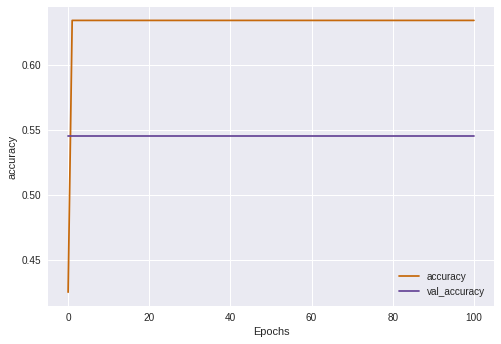

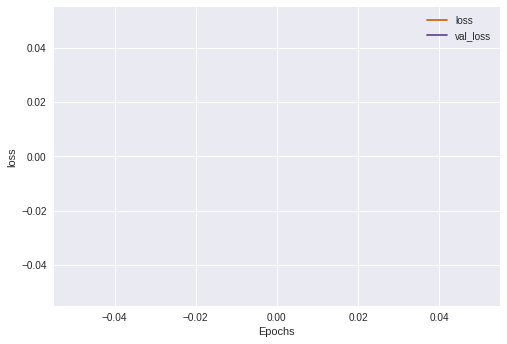

In [35]:
def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


pltGr(history, 'accuracy')
pltGr(history, 'loss')

In [44]:
testPreds = model.predict(testFeatures)

In [46]:
def errorPlot(labels, preds, binVal):
  err = preds - labels
  plt.hist(err, bins=binVal)
  plt.xlabel('Prediction-Error')
  plt.ylabel('Count')
  plt.show()